In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.0)
sns.set_palette("magma")
import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("../sf/data/SF_homes_zipcode.csv")
df

,address,price,zipcode
0,"3410 Jackson St, San Francisco, CA 94118",23500000,94118
1,"370 Wawona St, San Francisco, CA 94127",1849000,94127
2,"586 Paris St, San Francisco, CA 94112",750000,94112
3,"2919 Pine St, San Francisco, CA 94115",1195000,94115
4,"1011 Prague St, San Francisco, CA 94112",1080000,94112
...,...,...,...
1444,"1451 Mason St, San Francisco, CA 94133",2500000,94133
1445,"1810 8th Ave, San Francisco, CA 94122",1000000,94122
1446,"1808 8th Ave, San Francisco, CA 94122",1000000,94122
1447,"868 Moultrie St, San Francisco, CA 94110",2100000,94110


In [3]:
df['zipcode'].nunique()

27

In [4]:
df['zipcode'].value_counts()

94109    138
94110    138
94105     97
94107     94
94103     87
94114     82
94124     78
94131     73
94112     66
94117     66
94123     57
94118     56
94115     50
94133     49
94134     49
94116     48
94121     47
94122     36
94102     33
94132     24
94108     24
94127     21
94158     14
94111     13
94104      5
94130      3
94941      1
Name: zipcode, dtype: int64

In [5]:
DISTRICT={
    94118: "Laurel Heights",
    94109: "Nob Hill - Russian Hill",
    94110: "Mission - Bernal Heights",
    94105: "The East Cut",
    94107: "South Park",
    94103: "Mid-Market - SOMA",
    94114: "Castro",
    94124: "Bayview",
    94131: "Twin Peaks - Glen Park",
    94112: "Balboa Park",
    94117: "Cole Valley - Haight",
    94123: "Marina",
    94118: "Inner Richmond",
    94115: "Pacific Heights",
    94133: "North Beach",
    94134: "Portola",
    94116: "Sunset",
    94121: "Outer Richmond",
    94122: "Outer Sunset",
    94102: "Civic Center",
    94132: "Park Merced",
    94108: "Union Square",
    94127: "Sherwood Forest",
    94158: "Mission Bay",
    94111: "Financial District",
    94104: "Belden Place",
    94130: "Treasure Island",
    94941: "Mill Valley"
}

In [6]:
df['neighborhood'] = df['zipcode'].map(DISTRICT)

In [7]:
df['neighborhood'].value_counts()

Nob Hill - Russian Hill     138
Mission - Bernal Heights    138
The East Cut                 97
South Park                   94
Mid-Market - SOMA            87
Castro                       82
Bayview                      78
Twin Peaks - Glen Park       73
Balboa Park                  66
Cole Valley - Haight         66
Marina                       57
Inner Richmond               56
Pacific Heights              50
North Beach                  49
Portola                      49
Sunset                       48
Outer Richmond               47
Outer Sunset                 36
Civic Center                 33
Park Merced                  24
Union Square                 24
Sherwood Forest              21
Mission Bay                  14
Financial District           13
Belden Place                  5
Treasure Island               3
Mill Valley                   1
Name: neighborhood, dtype: int64

In [8]:
df.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

neighborhood
Marina                      4.996114e+06
Pacific Heights             4.084180e+06
Inner Richmond              3.538080e+06
North Beach                 3.463571e+06
Outer Richmond              2.733649e+06
Nob Hill - Russian Hill     2.663269e+06
Sherwood Forest             2.482048e+06
Cole Valley - Haight        2.228894e+06
Civic Center                2.211237e+06
The East Cut                2.116670e+06
Union Square                2.076667e+06
Financial District          1.953462e+06
Castro                      1.807584e+06
Mission - Bernal Heights    1.783437e+06
Twin Peaks - Glen Park      1.692604e+06
Outer Sunset                1.576494e+06
Mid-Market - SOMA           1.553315e+06
Belden Place                1.529600e+06
Sunset                      1.516391e+06
Park Merced                 1.444199e+06
Balboa Park                 1.251807e+06
South Park                  1.196317e+06
Mission Bay                 1.103637e+06
Portola                     1.102746e+06
Tre

<Axes: xlabel='price', ylabel='neighborhood'>

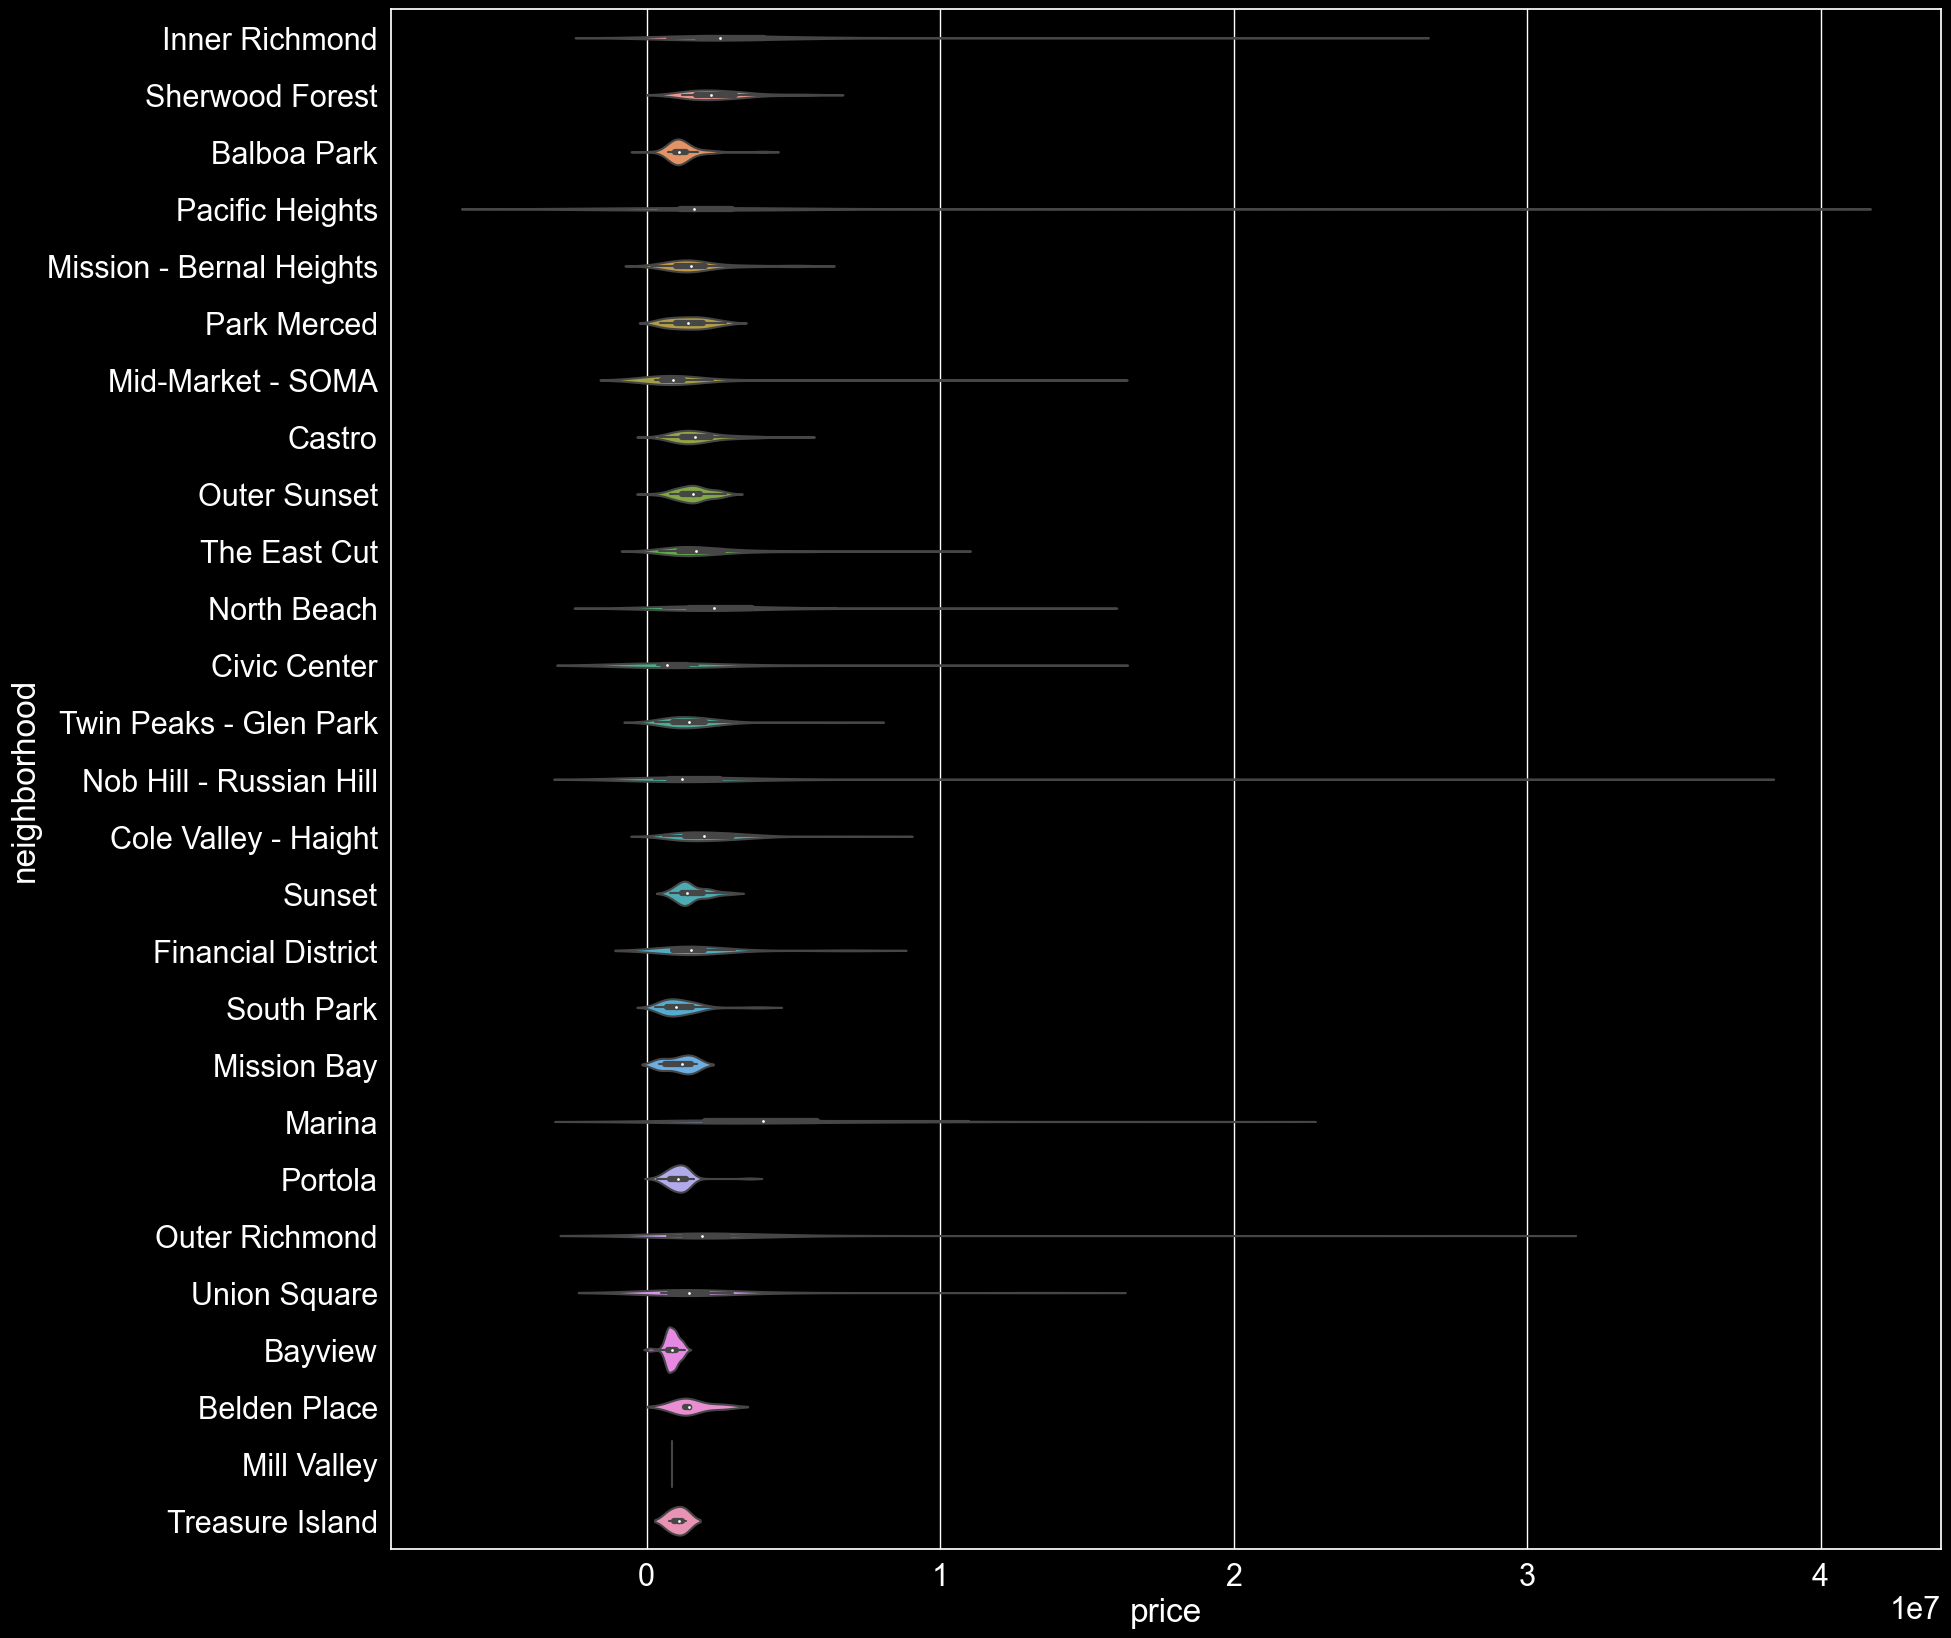

In [9]:
sns.violinplot(y="neighborhood", x="price", data=df)

In [10]:
df[df['zipcode'] == 94121]['price'].mean(), df[df['zipcode'] == 94121]['price'].std()

(2733648.936170213, 3945263.85147693)

In [11]:
df[df['neighborhood'] == 'Marina']['price'].mean(), df[df['neighborhood'] == 'Marina']['price'].std()

(4996114.03508772, 4251084.037187229)

In [12]:
df[df['neighborhood'] == 'Pacific Heights']['price'].mean(), df[df['neighborhood'] == 'Pacific Heights']['price'].std()

(4084179.96, 7326762.73912727)

In [13]:
df.sort_values("price")

,address,price,zipcode,neighborhood
665,"null, San Francisco, CA 94112",3500,94112,Balboa Park
239,"1874 Quesada Ave, San Francisco, CA 94124",99900,94124,Bayview
966,"1882 Quesada Ave, San Francisco, CA 94124",111550,94124,Bayview
1387,"132 Bache St, San Francisco, CA 94110",150000,94110,Mission - Bernal Heights
527,"881 Moultrie St, San Francisco, CA 94110",200000,94110,Mission - Bernal Heights
...,...,...,...,...
0,"3410 Jackson St, San Francisco, CA 94118",23500000,94118,Inner Richmond
1093,"9 25th Ave, San Francisco, CA 94121",28000000,94121,Outer Richmond
1398,"2006 Washington St Unit Ph, San Francisco, CA ...",35000000,94109,Nob Hill - Russian Hill
1054,"2799 Broadway St, San Francisco, CA 94115",35000000,94115,Pacific Heights


In [17]:
df.groupby("neighborhood")['price'].mean()

neighborhood
Balboa Park                 1.251807e+06
Bayview                     8.627118e+05
Belden Place                1.529600e+06
Castro                      1.807584e+06
Civic Center                2.211237e+06
Cole Valley - Haight        2.228894e+06
Financial District          1.953462e+06
Inner Richmond              3.538080e+06
Marina                      4.996114e+06
Mid-Market - SOMA           1.553315e+06
Mill Valley                 8.750000e+05
Mission - Bernal Heights    1.783437e+06
Mission Bay                 1.103637e+06
Nob Hill - Russian Hill     2.663269e+06
North Beach                 3.463571e+06
Outer Richmond              2.733649e+06
Outer Sunset                1.576494e+06
Pacific Heights             4.084180e+06
Park Merced                 1.444199e+06
Portola                     1.102746e+06
Sherwood Forest             2.482048e+06
South Park                  1.196317e+06
Sunset                      1.516391e+06
The East Cut                2.116670e+06
Tre

In [22]:
pd.crosstab(df['neighborhood'], df['price'].mean())

col_0,2.116209e+06
neighborhood,
Balboa Park,66
Bayview,78
Belden Place,5
Castro,82
Civic Center,33
Cole Valley - Haight,66
Financial District,13
Inner Richmond,56
Marina,57


In [26]:
pd.pivot_table(df, values=['price'], index=['neighborhood'], aggfunc=np.mean)

,price
neighborhood,
Balboa Park,1.251807e+06
Bayview,8.627118e+05
Belden Place,1.529600e+06
Castro,1.807584e+06
Civic Center,2.211237e+06
Cole Valley - Haight,2.228894e+06
Financial District,1.953462e+06
Inner Richmond,3.538080e+06
Marina,4.996114e+06


In [29]:
df

,address,price,zipcode,neighborhood
0,"3410 Jackson St, San Francisco, CA 94118",23500000,94118,Inner Richmond
1,"370 Wawona St, San Francisco, CA 94127",1849000,94127,Sherwood Forest
2,"586 Paris St, San Francisco, CA 94112",750000,94112,Balboa Park
3,"2919 Pine St, San Francisco, CA 94115",1195000,94115,Pacific Heights
4,"1011 Prague St, San Francisco, CA 94112",1080000,94112,Balboa Park
...,...,...,...,...
1444,"1451 Mason St, San Francisco, CA 94133",2500000,94133,North Beach
1445,"1810 8th Ave, San Francisco, CA 94122",1000000,94122,Outer Sunset
1446,"1808 8th Ave, San Francisco, CA 94122",1000000,94122,Outer Sunset
1447,"868 Moultrie St, San Francisco, CA 94110",2100000,94110,Mission - Bernal Heights


In [30]:
df

,address,price,zipcode,neighborhood
0,"3410 Jackson St, San Francisco, CA 94118",23500000,94118,Inner Richmond
1,"370 Wawona St, San Francisco, CA 94127",1849000,94127,Sherwood Forest
2,"586 Paris St, San Francisco, CA 94112",750000,94112,Balboa Park
3,"2919 Pine St, San Francisco, CA 94115",1195000,94115,Pacific Heights
4,"1011 Prague St, San Francisco, CA 94112",1080000,94112,Balboa Park
...,...,...,...,...
1444,"1451 Mason St, San Francisco, CA 94133",2500000,94133,North Beach
1445,"1810 8th Ave, San Francisco, CA 94122",1000000,94122,Outer Sunset
1446,"1808 8th Ave, San Francisco, CA 94122",1000000,94122,Outer Sunset
1447,"868 Moultrie St, San Francisco, CA 94110",2100000,94110,Mission - Bernal Heights


In [36]:
df['neighborhood'].value_counts(normalize=False)

Nob Hill - Russian Hill     138
Mission - Bernal Heights    138
The East Cut                 97
South Park                   94
Mid-Market - SOMA            87
Castro                       82
Bayview                      78
Twin Peaks - Glen Park       73
Balboa Park                  66
Cole Valley - Haight         66
Marina                       57
Inner Richmond               56
Pacific Heights              50
North Beach                  49
Portola                      49
Sunset                       48
Outer Richmond               47
Outer Sunset                 36
Civic Center                 33
Park Merced                  24
Union Square                 24
Sherwood Forest              21
Mission Bay                  14
Financial District           13
Belden Place                  5
Treasure Island               3
Mill Valley                   1
Name: neighborhood, dtype: int64

In [37]:
df.groupby('neighborhood')['price'].sum()

neighborhood
Balboa Park                  82619253
Bayview                      67291523
Belden Place                  7648000
Castro                      148221880
Civic Center                 72970833
Cole Valley - Haight        147107000
Financial District           25395000
Inner Richmond              198132499
Marina                      284778500
Mid-Market - SOMA           135138437
Mill Valley                    875000
Mission - Bernal Heights    246114282
Mission Bay                  15450916
Nob Hill - Russian Hill     367531056
North Beach                 169714999
Outer Richmond              128481500
Outer Sunset                 56753777
Pacific Heights             204208998
Park Merced                  34660776
Portola                      54034532
Sherwood Forest              52123000
South Park                  112453792
Sunset                       72786776
The East Cut                205316950
Treasure Island               3178000
Twin Peaks - Glen Park      123560068

In [33]:
df[df['neighborhood'] == 'Pacific Heights']

,address,price,zipcode,neighborhood
3,"2919 Pine St, San Francisco, CA 94115",1195000,94115,Pacific Heights
20,"2500 Divisadero St, San Francisco, CA 94115",14750000,94115,Pacific Heights
57,"2168 Bush St, San Francisco, CA 94115",1198000,94115,Pacific Heights
69,"2298 Pacific Ave Unit 1N, San Francisco, CA 94115",1595000,94115,Pacific Heights
74,"1940 Buchanan St, San Francisco, CA 94115",1395000,94115,Pacific Heights
84,"2833 Sacramento St, San Francisco, CA 94115",1688750,94115,Pacific Heights
134,"2830 Pacific Ave, San Francisco, CA 94115",35000000,94115,Pacific Heights
140,"2737 Bush St, San Francisco, CA 94115",1295000,94115,Pacific Heights
179,"2110-A Pine St, San Francisco, CA 94115",799000,94115,Pacific Heights
204,"1322 Lyon St, San Francisco, CA 94115",1300000,94115,Pacific Heights


In [ ]:
# table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
#                        aggfunc={'D': np.mean,
#                                 'E': [min, max, np.mean]})